In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

def vocalnoPlot(data:pd.DataFrame,
                x = 'log2FoldChange',
                y = 'pvalue',
                title = 'vocanlo',
                xlim = None,
                ylim = None,
                colors = None,
                **kwargs):
    # 先设置一下自己的颜色
    
    """
    example use: 
        vocalnoPlot(differentialGeneTable, x = 'fc', y = 'pval', xlim=[0, 4], title = "differential analysis vocanlo")
        plt.savefig("pic.png",dpi = 200)
    """
    if not colors:
        colors = ["#01c5c4","#ff414d", "#686d76"]
        
    sns.set_palette(sns.color_palette(colors))

    # 绘图
    ax=sns.scatterplot(x=x, y=y,data=data,
                    hue='type',#颜色映射
                    hue_order=["down", "up", "nosig"],
                    edgecolor = None,#点边界颜色
                    s=8,#点大小
                    )
    # 标签
    ax.set_title(title)
    ax.set_xlabel("log2FC")
    ax.set_ylabel("-log10(pvalue)")
    if isinstance(xlim, list):
        ax.set_xlim(xlim)
    if isinstance(xlim, list):
        ax.set_ylim(ylim)
    #移动图例位置
    ax.legend(loc='center right', bbox_to_anchor=(0.95,0.76), ncol=1)
    return ax 

In [3]:
differentialGeneTable = pd.read_csv("All_results.csv",index_col=0)

def func(x):
    if x > 1 :
        return "up"
    if x < -1:
        return "down"
    else:
        return "nosig"

differentialGeneTable["type"] = differentialGeneTable["log2FoldChange"].apply(func,)
differentialGeneTable["pvalue"] = differentialGeneTable["pvalue"].apply(lambda x: -np.log10(x),)
differentialGeneTable

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,type
MSTRG.100|LOC4326813,231.998919,1.462841,0.367894,3.976257,4.154849,0.001796,up
MSTRG.100,283.569700,-0.431188,0.318131,-1.355380,0.756227,0.570412,nosig
MSTRG.149|LOC9268894,653.826041,0.090025,0.201157,0.447534,0.184097,0.922513,nosig
gene-LOC107280387|LOC107280387,6.179797,-0.926007,1.633335,-0.566943,0.243552,NaN,nosig
gene-LOC107281500|LOC107281500,15.928422,1.136468,1.074136,1.058029,0.537539,0.711871,up
...,...,...,...,...,...,...,...
gene-LOC4352903|LOC4352903,0.000000,NaN,NaN,NaN,NaN,NaN,nosig
gene-LOC4351428|LOC4351428,0.000000,NaN,NaN,NaN,NaN,NaN,nosig
gene-LOC107279840|LOC107279840,0.000000,NaN,NaN,NaN,NaN,NaN,nosig
cds-NP_044337.1,0.000000,NaN,NaN,NaN,NaN,NaN,nosig


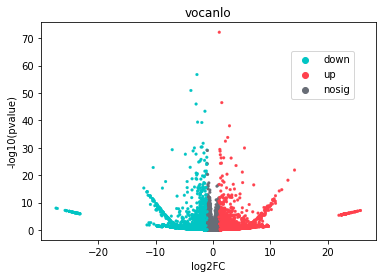

In [4]:
pic = vocalnoPlot(data = differentialGeneTable)